In [2]:
from ES import populational_isotropic_ES, populational_non_isotropic_ES, ESAlgorithm
import matplotlib.pyplot as plt
import numpy as np
from py_expression_eval import Parser
parser = Parser()


# Comparação dos Algoritmos

In [ ]:
def f1(seed=0):
    experiment = {}

    alg = ESAlgorithm()
    alg.set_evaluation_expression("(x + 2*y - 7)^2 + (2*x + y - 5)^2")
    alg.set_variable_bounds("x", 10, True, -10, True)
    alg.set_variable_bounds("y", 10, True, -10, True)

    res_1 = alg.one_plus_one_ES(sigma=0.5, c=0.817, n=10, iter=300, seed=seed)
    res_2 = alg.populational_isotropic_ES(sigma_var=0.5, dimension_gen_interval=(-10, 10), iter=10, seed=seed, num_parents=3, num_offspring=10)
    res_3 = alg.populational_non_isotropic_ES(sigma_var=0.5, dimension_gen_interval=(-10, 10), iter=10, seed=seed, num_parents=3, num_offspring=10)

    experiment['1p1'] =  res_1[-2:-1][0]['eval']
    experiment['pi'] =  res_2[0]['eval']
    experiment['pni'] =  res_3[0]['eval']

    #print(res_1[-2:-1][0]['eval'])
    #print(res_2[0]['eval'])
    #print(res_3[0]['eval'])
    return experiment


experiments = []
num_exp = 30
for i in range(num_exp):
    experiments.append(f1(i))

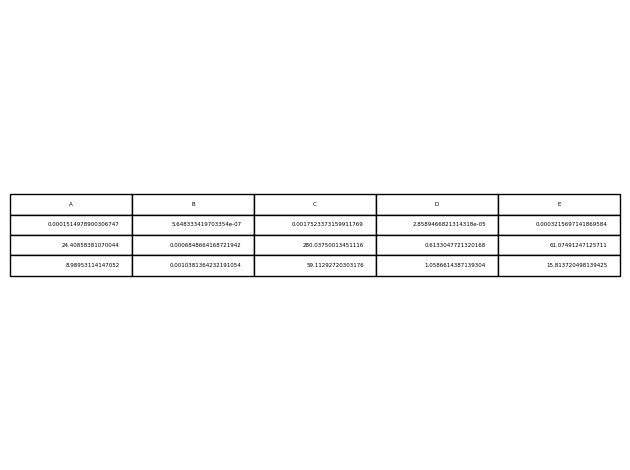

[[0.0001514978900306747, 5.648333419703354e-07, 0.0017523373159911769, 2.8589466821314318e-05, 0.0003215697141869584], [24.40858381070044, 0.0006848664168721942, 280.03750013451116, 0.6133047721320168, 61.07491247125711], [8.98953114147052, 0.0010381364232191054, 59.11292720303176, 1.0586614387139304, 15.813720498139425]]


In [38]:

res_1p1 = [e['1p1'] for e in experiments]
res_pi = [e['pi'] for e in experiments]
res_pni = [e['pni'] for e in experiments]

tabela = [None, None, None]

def table_row(array):
    return [np.average(array), np.min(array), np.max(array), np.median(array), np.std(array)]

tabela[0] = table_row(res_1p1)
tabela[1] = table_row(res_pi)
tabela[2] = table_row(res_pni)

fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(tabela, colLabels=['A', 'B', 'C', 'D', 'E'], loc='center')
fig.tight_layout()
plt.show()
print(tabela)

In [6]:
res = f1()
x_array = [i['dim']['x'] for i in res]
y_array = [i['dim']['y'] for i in res]

#plt.plot(x_array, y_array, 'ro', markersize=4)
#plt.axis([-10, 10, -10, 10])
#plt.show()
print('\n'.join([str(d) for d in res]))


@np.vectorize
def f(x, y):
    return parser.parse("(x + 2*y - 7)^2 + (2*x + y - 5)^2").evaluate({"x": x, "y": y})


n = 100
x = np.linspace(-10, 10, n)
y = np.linspace(-10, 10, n)
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots(1, 1)
cp = ax.contourf(X, Y, f(X, Y), 40, cmap=plt.cm.hot)
fig.colorbar(cp)  # Add a colorbar to a plot
ax.plot(x_array, y_array, 'bo', markersize=4)
ax.set_title('Curvas de nível')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()


NameError: name 'res' is not defined